In [1]:
import pandas as pd
import numpy as np
import json

dfs=[]
for file_name in ["times.csv","times2.csv","times3.csv","times4.csv","times5.csv","times6.csv","times7.csv","times8.csv","times9.csv","times10.csv","times11.csv","times12.csv","times13.csv","times14.csv"]:
    df = pd.read_csv(file_name, encoding='utf-16-le', sep=';')
    df["solvable"] = df["solvable"].astype(bool)
    df["hasMultipleResults"] = df["hasMultipleResults"].astype(bool)
    dfs.append(df)

In [2]:
df = pd.concat(dfs, ignore_index=True)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_18528\3539364041.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, ignore_index=True)


,elapsedMs,solvable,hasMultipleResults,cells,cellsSolved
0,4.6636,True,True,"[5,-1,-1,1,-1,8,-1,7,-1,-1,-1,-1,-1,4,-1,5,6,-...","[5,2,4,1,6,8,3,7,9,1,3,9,2,4,7,5,6,8,6,7,8,3,5..."
1,8.3668,True,True,"[-1,-1,-1,-1,-1,6,8,-1,7,-1,-1,8,9,-1,7,-1,-1,...","[3,1,4,2,5,6,8,9,7,5,6,8,9,1,7,4,3,2,2,9,7,4,3..."
2,10.0171,True,True,"[7,-1,3,5,1,4,-1,-1,-1,4,-1,9,-1,-1,-1,-1,-1,7...","[7,2,3,5,1,4,8,6,9,4,1,9,3,8,6,2,5,7,6,5,8,9,7..."
3,0.9852,True,True,"[7,-1,-1,-1,-1,-1,-1,-1,8,-1,-1,-1,-1,-1,8,-1,...","[7,1,2,3,4,9,5,6,8,3,4,5,2,6,8,7,1,9,8,6,9,5,7..."
4,57.6559,True,True,"[-1,-1,-1,2,-1,-1,-1,1,8,1,-1,6,4,-1,8,-1,-1,5...","[4,3,5,2,7,9,6,1,8,1,9,6,4,3,8,2,7,5,2,8,7,1,6..."
...,...,...,...,...,...
226,2.1103,True,True,"[3,2,-1,-1,-1,8,9,-1,-1,8,-1,-1,2,4,-1,-1,-1,-...","[3,2,1,5,6,8,9,4,7,8,6,7,2,4,9,1,5,3,5,4,9,1,7..."
227,174.4559,True,True,"[1,7,-1,-1,-1,3,4,-1,8,-1,6,8,-1,9,-1,-1,-1,3,...","[1,7,9,2,6,3,4,5,8,2,6,8,4,9,5,1,7,3,5,3,4,7,1..."
228,15.3362,True,True,"[6,-1,-1,-1,-1,-1,-1,5,-1,1,4,-1,5,-1,-1,-1,-1...","[6,7,2,1,8,4,3,5,9,1,4,3,5,9,7,6,2,8,5,9,8,6,2..."
229,94.0431,True,True,"[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...","[2,1,3,6,7,4,5,8,9,5,8,4,2,9,1,3,7,6,6,7,9,3,5..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   elapsedMs           231 non-null    float64
 1   solvable            231 non-null    bool   
 2   hasMultipleResults  231 non-null    bool   
 3   cells               231 non-null    object 
 4   cellsSolved         231 non-null    object 
dtypes: bool(2), float64(1), object(2)
memory usage: 6.0+ KB


In [4]:
df["elapsedMs"].describe()

count       231.000000
mean       9239.353310
std       31272.463795
min           0.075700
25%           6.860900
50%          37.380000
75%         594.608050
max      223190.901400
Name: elapsedMs, dtype: float64

<Axes: xlabel='solvable'>

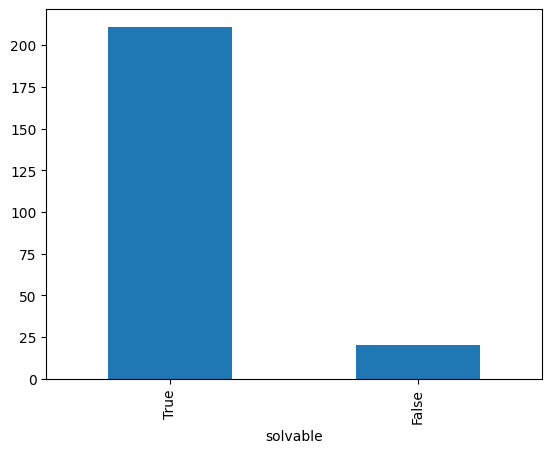

In [5]:
df["solvable"].value_counts().plot(kind="bar")

<Axes: xlabel='hasMultipleResults'>

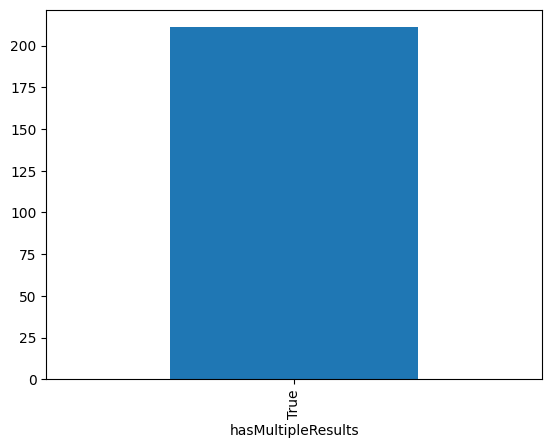

In [6]:
df[df['solvable']]["hasMultipleResults"].value_counts().plot(kind="bar")

In [7]:
np.matrix(df.loc[0]["cells"])

matrix([[ 5, -1, -1,  1, -1,  8, -1,  7, -1, -1, -1, -1, -1,  4, -1,  5,
          6, -1, -1, -1, -1,  3, -1,  9,  4, -1, -1, -1, -1, -1, -1, -1,
          6,  8, -1, -1,  8,  4, -1, -1,  2, -1, -1,  5, -1, -1, -1, -1,
         -1, -1, -1, -1, -1,  6, -1, -1,  1,  8,  3,  5, -1, -1, -1, -1,
         -1, -1, -1, -1,  4, -1,  3, -1,  4,  5, -1, -1, -1,  2, -1, -1,
         -1]])

In [8]:

np.matrix([json.loads(df.loc[0]["cells"])[i:i+9] for i in range(0, 81, 9)]), np.matrix([json.loads(df.loc[0]["cellsSolved"])[i:i+9] for i in range(0, 81, 9)])

(matrix([[ 5, -1, -1,  1, -1,  8, -1,  7, -1],
         [-1, -1, -1, -1,  4, -1,  5,  6, -1],
         [-1, -1, -1,  3, -1,  9,  4, -1, -1],
         [-1, -1, -1, -1, -1,  6,  8, -1, -1],
         [ 8,  4, -1, -1,  2, -1, -1,  5, -1],
         [-1, -1, -1, -1, -1, -1, -1, -1,  6],
         [-1, -1,  1,  8,  3,  5, -1, -1, -1],
         [-1, -1, -1, -1, -1,  4, -1,  3, -1],
         [ 4,  5, -1, -1, -1,  2, -1, -1, -1]]),
 matrix([[5, 2, 4, 1, 6, 8, 3, 7, 9],
         [1, 3, 9, 2, 4, 7, 5, 6, 8],
         [6, 7, 8, 3, 5, 9, 4, 1, 2],
         [2, 1, 5, 4, 7, 6, 8, 9, 3],
         [8, 4, 6, 9, 2, 3, 1, 5, 7],
         [3, 9, 7, 5, 8, 1, 2, 4, 6],
         [7, 6, 1, 8, 3, 5, 9, 2, 4],
         [9, 8, 2, 6, 1, 4, 7, 3, 5],
         [4, 5, 3, 7, 9, 2, 6, 8, 1]]))